In [3]:
import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [4]:

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


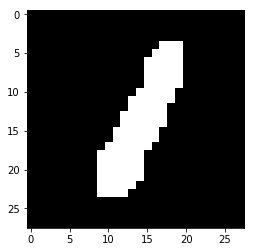

In [6]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [7]:
def activation(x):
    return 1/(1+torch.exp(-x))

inputs = images.view(images.shape[0], -1)

w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2

In [8]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

In [9]:
prob = softmax(out)

In [10]:
print(prob)

tensor([[3.0015e-17, 3.4719e-07, 4.9340e-04, 9.3033e-06, 1.3295e-01, 3.8660e-04,
         8.6615e-01, 1.1064e-05, 8.8780e-14, 2.0878e-06],
        [1.5613e-14, 3.0908e-06, 3.9371e-12, 2.1494e-04, 2.5065e-01, 5.1589e-05,
         7.4907e-01, 6.8083e-08, 2.8427e-11, 7.6132e-06],
        [3.2493e-19, 1.0037e-03, 3.5544e-13, 3.2077e-06, 1.5283e-03, 2.8456e-04,
         9.9718e-01, 6.2784e-10, 6.9782e-18, 4.8319e-07],
        [1.6903e-17, 3.6021e-08, 5.3315e-10, 1.0137e-10, 1.4568e-06, 9.9999e-01,
         8.0193e-06, 5.2823e-10, 3.2277e-22, 6.5026e-12],
        [3.0546e-14, 2.6561e-01, 1.1495e-06, 3.8069e-01, 2.3996e-03, 3.4494e-01,
         6.2872e-03, 1.5144e-07, 1.1857e-15, 6.5580e-05],
        [9.8648e-15, 1.1888e-01, 1.2061e-08, 3.0657e-08, 6.7915e-06, 7.8702e-01,
         9.3465e-02, 5.9837e-05, 1.8661e-13, 5.6005e-04],
        [2.1369e-11, 2.8043e-05, 1.6138e-08, 1.4783e-07, 1.0193e-01, 3.6051e-03,
         8.9213e-01, 4.5368e-05, 8.6388e-19, 2.2577e-03],
        [1.3901e-14, 7.3226

         8.4032e-02, 1.9508e-07, 2.6329e-11, 5.4766e-08]])


In [11]:
from torch import nn

In [13]:
class Mnist(nn.Module):
    def __init__(self):
        super.__init__()
        self.hidden = nn.Linear(786,256)
        self.output = nn.Linear(256,10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x   
        

In [14]:


import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x



In [15]:
class Mnist(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784,128)
        self.hidden2 = nn.Linear(128,64)
        self.out = nn.Linear(64,10)
    def forward(self,x):
        x = self.hidden1(x)
        x=F.relu(x)
        x= self.hidden2(x)
        x=F.relu(x)
        x = self.out(x)
        x= F.softmax(x)
        return x
model = Mnist()
model

Mnist(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)

In [17]:
print(model.hidden1.weight)
print(model.hidden1.bias)

Parameter containing:
tensor([[-0.0121, -0.0051, -0.0257,  ...,  0.0130, -0.0155,  0.0188],
        [ 0.0131, -0.0117,  0.0114,  ...,  0.0331,  0.0294, -0.0290],
        [-0.0239, -0.0206,  0.0020,  ..., -0.0213, -0.0343,  0.0295],
        ...,
        [-0.0317,  0.0296,  0.0168,  ..., -0.0200, -0.0169,  0.0006],
        [-0.0080, -0.0132, -0.0138,  ...,  0.0252, -0.0238,  0.0028],
        [-0.0113, -0.0042, -0.0062,  ..., -0.0162, -0.0098, -0.0083]],
       requires_grad=True)
Parameter containing:
tensor([-1.3827e-02, -2.5787e-02,  9.1389e-03, -2.6902e-02,  3.0995e-02,
         2.9497e-02, -1.6748e-02,  6.8179e-03,  3.5176e-02, -6.6347e-03,
        -1.3184e-02,  1.2865e-02, -2.0663e-02, -2.4560e-02, -2.1215e-02,
         2.5171e-02, -2.0260e-02, -2.4664e-02,  1.5519e-02,  1.4749e-02,
        -5.1517e-03, -2.5748e-02,  2.3329e-02,  1.5682e-02, -1.8678e-02,
         1.9442e-02,  1.0726e-02,  1.0355e-02,  2.5185e-02, -2.7092e-02,
        -2.9648e-02, -2.6396e-02, -2.2342e-02, -2.6772e-0

In [18]:
pwd

'C:\\Users\\Acer'